In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re


In [3]:
#load the dataset
movie_json_path = '/content/idmb.json'
movie_dataframe = pd.read_json(movie_json_path)
movie_dataframe.head()

,Title,Movie Url,Year,Certificate,Genre,Runtime,Metascore,Rating,Description,Director,Stars,Votes,Gross,Movie Poster
0,The Godfather,https://www.imdb.com/title/tt0068646/,1972,M18,"[Crime, Drama]",175.0,100.0,9.2,The aging patriarch of an organized crime dyna...,Francis Ford Coppola,"[Marlon Brando, Al Pacino, James Caan, Diane K...","1,894,039",$134.97M,https://m.media-amazon.com/images/M/MV5BM2MyNj...
1,The Godfather Part II,https://www.imdb.com/title/tt0071562/,1974,PG,"[Crime, Drama]",202.0,90.0,9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,"[Al Pacino, Robert De Niro, Robert Duvall, Dia...","1,291,787",$57.30M,https://m.media-amazon.com/images/M/MV5BMWMwMG...
2,Ordinary People,https://www.imdb.com/title/tt0081283/,1980,PG,[Drama],124.0,86.0,7.7,The accidental death of the older son of an af...,Robert Redford,"[Donald Sutherland, Mary Tyler Moore, Judd Hir...","54,024",$54.80M,https://m.media-amazon.com/images/M/MV5BNWU3MD...
3,Lawrence of Arabia,https://www.imdb.com/title/tt0056172/,1962,PG,"[Adventure, Biography, Drama]",218.0,100.0,8.3,"The story of T.E. Lawrence, the English office...",David Lean,"[Peter O'Toole, Alec Guinness, Anthony Quinn, ...","299,317",$44.82M,https://m.media-amazon.com/images/M/MV5BYWY5Zj...
4,Straw Dogs,https://www.imdb.com/title/tt0067800/,1971,M18,"[Crime, Drama, Thriller]",113.0,73.0,7.4,A young American and his English wife come to ...,Sam Peckinpah,"[Dustin Hoffman, Susan George, Peter Vaughan, ...","61,994",None,https://m.media-amazon.com/images/M/MV5BNDBiZG...


In [4]:
#data types
movie_dataframe.dtypes

Title            object
Movie Url        object
Year             object
Certificate      object
Genre            object
Runtime         float64
Metascore       float64
Rating          float64
Description      object
Director         object
Stars            object
Votes            object
Gross            object
Movie Poster     object
dtype: object

In [ ]:
#shape of the dataset
movie_dataframe.shape

(2956, 14)

**Data Cleaning**

In [ ]:
#missing values
movie_dataframe.isnull().sum()

Title             0
Movie Url         0
Year              0
Certificate       5
Genre             0
Runtime           1
Metascore       127
Rating            1
Description       0
Director          0
Stars             0
Votes             1
Gross           197
Movie Poster      0
dtype: int64

In [5]:
#drop year row with missing values
movie_dataframe[movie_dataframe['Year'].isnull()]
movie_dataframe = movie_dataframe.drop(2876)

,Title,Movie Url,Year,Certificate,Genre,Runtime,Metascore,Rating,Description,Director,Stars,Votes,Gross,Movie Poster
2876,Sherlock Holmes 3,https://www.imdb.com/title/tt2094116/,None,None,"[Action, Adventure, Mystery]",NaN,NaN,NaN,The plot is unknown at this time.,Dexter Fletcher,"[Robert Downey Jr., Jude Law, Eddie Marsan, Ja...",None,None,https://m.media-amazon.com/images/M/MV5BMzM3Y2...


**Clean year column**

In [7]:
def drop_list_in_year(df: pd.DataFrame) ->pd.DataFrame:
  if df.empty:
    raise ValueError('Dataframe is empty')
  
  if 'Year' not in df.columns:
    raise KeyError('Year column does not exist in the Dataframe')

  for index,year in enumerate(df['Year']):
    if isinstance(year,list):
      try:
        df.drop(index = index,inplace = True)
        print(f'Year: {year} have been dropped from the dataframe')
      except Exception as e:
        print(f'Error occured while dropping the rows with index: {index}')
        
  return df
      

drop_list_in_year(movie_dataframe)


Year: [1964, 1968] have been dropped from the dataframe
Year: [1964, 1968] have been dropped from the dataframe
Year: [1995, 2016] have been dropped from the dataframe
Year: [2008, 2015] have been dropped from the dataframe


,Title,Movie Url,Year,Certificate,Genre,Runtime,Metascore,Rating,Description,Director,Stars,Votes,Gross,Movie Poster
0,The Godfather,https://www.imdb.com/title/tt0068646/,1972,M18,"[Crime, Drama]",175.0,100.0,9.2,The aging patriarch of an organized crime dyna...,Francis Ford Coppola,"[Marlon Brando, Al Pacino, James Caan, Diane K...","1,894,039",$134.97M,https://m.media-amazon.com/images/M/MV5BM2MyNj...
1,The Godfather Part II,https://www.imdb.com/title/tt0071562/,1974,PG,"[Crime, Drama]",202.0,90.0,9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,"[Al Pacino, Robert De Niro, Robert Duvall, Dia...","1,291,787",$57.30M,https://m.media-amazon.com/images/M/MV5BMWMwMG...
2,Ordinary People,https://www.imdb.com/title/tt0081283/,1980,PG,[Drama],124.0,86.0,7.7,The accidental death of the older son of an af...,Robert Redford,"[Donald Sutherland, Mary Tyler Moore, Judd Hir...","54,024",$54.80M,https://m.media-amazon.com/images/M/MV5BNWU3MD...
3,Lawrence of Arabia,https://www.imdb.com/title/tt0056172/,1962,PG,"[Adventure, Biography, Drama]",218.0,100.0,8.3,"The story of T.E. Lawrence, the English office...",David Lean,"[Peter O'Toole, Alec Guinness, Anthony Quinn, ...","299,317",$44.82M,https://m.media-amazon.com/images/M/MV5BYWY5Zj...
4,Straw Dogs,https://www.imdb.com/title/tt0067800/,1971,M18,"[Crime, Drama, Thriller]",113.0,73.0,7.4,A young American and his English wife come to ...,Sam Peckinpah,"[Dustin Hoffman, Susan George, Peter Vaughan, ...","61,994",None,https://m.media-amazon.com/images/M/MV5BNDBiZG...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2951,Straight Outta Compton,https://www.imdb.com/title/tt1398426/,2015,M18,"[Biography, Drama, History]",147.0,72.0,7.8,The rap group NWA emerges from the mean street...,F. Gary Gray,"[O'Shea Jackson Jr., Corey Hawkins, Jason Mitc...","207,557",$161.20M,https://m.media-amazon.com/images/M/MV5BMTA5Mz...
2952,The Little Death,https://www.imdb.com/title/tt2785032/,2014,M18,"[Comedy, Drama, Romance]",96.0,46.0,7.0,The secret lives of five suburban couples livi...,Josh Lawson,"[Bojana Novakovic, Josh Lawson, Damon Herriman...","27,063",$0.02M,https://m.media-amazon.com/images/M/MV5BYjUxOT...
2953,What We Did on Our Holiday,https://www.imdb.com/title/tt2725962/,2014,PG13,"[Comedy, Drama]",95.0,54.0,6.9,A family of five heads to Granddad's big 75th-...,Andy Hamilton,"[Guy Jenkin, Rosamund Pike, David Tennant, Bil...","22,821",None,https://m.media-amazon.com/images/M/MV5BMTQzNz...
2954,Poltergeist,https://www.imdb.com/title/tt1029360/,2015,PG13,"[Horror, Thriller]",93.0,47.0,4.9,A family whose suburban home is haunted by evi...,Gil Kenan,"[Sam Rockwell, Rosemarie DeWitt, Kennedi Cleme...","59,329",$47.43M,https://m.media-amazon.com/images/M/MV5BMjI2ND...


**Dealing with Missing Values**

In [8]:
columns_with_missing_values = ['Certificate','Runtime','Metascore','Rating','Votes','Gross']

In [9]:
movie_dataframe[columns_with_missing_values].head()

,Certificate,Runtime,Metascore,Rating,Votes,Gross
0,M18,175.0,100.0,9.2,"1,894,039",$134.97M
1,PG,202.0,90.0,9.0,"1,291,787",$57.30M
2,PG,124.0,86.0,7.7,"54,024",$54.80M
3,PG,218.0,100.0,8.3,"299,317",$44.82M
4,M18,113.0,73.0,7.4,"61,994",None


In [10]:
movie_dataframe[columns_with_missing_values].dtypes

Certificate     object
Runtime        float64
Metascore      float64
Rating         float64
Votes           object
Gross           object
dtype: object

**Impute Certificate column with Mode**

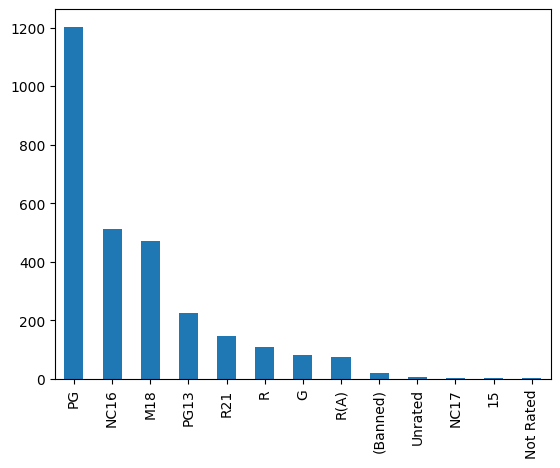

In [11]:
movie_dataframe['Certificate'].value_counts().plot(kind = 'bar')
plt.show()

**Mode of column certificate**

In [13]:
def impute_certificate_column(df:pd.DataFrame) ->pd.DataFrame:
  mode_value = df['Certificate'].mode()[0]
  df['Certificate'].fillna(mode_value,inplace = True)
  return df

impute_certificate_column(movie_dataframe)

,Title,Movie Url,Year,Certificate,Genre,Runtime,Metascore,Rating,Description,Director,Stars,Votes,Gross,Movie Poster
0,The Godfather,https://www.imdb.com/title/tt0068646/,1972,M18,"[Crime, Drama]",175.0,100.0,9.2,The aging patriarch of an organized crime dyna...,Francis Ford Coppola,"[Marlon Brando, Al Pacino, James Caan, Diane K...","1,894,039",$134.97M,https://m.media-amazon.com/images/M/MV5BM2MyNj...
1,The Godfather Part II,https://www.imdb.com/title/tt0071562/,1974,PG,"[Crime, Drama]",202.0,90.0,9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,"[Al Pacino, Robert De Niro, Robert Duvall, Dia...","1,291,787",$57.30M,https://m.media-amazon.com/images/M/MV5BMWMwMG...
2,Ordinary People,https://www.imdb.com/title/tt0081283/,1980,PG,[Drama],124.0,86.0,7.7,The accidental death of the older son of an af...,Robert Redford,"[Donald Sutherland, Mary Tyler Moore, Judd Hir...","54,024",$54.80M,https://m.media-amazon.com/images/M/MV5BNWU3MD...
3,Lawrence of Arabia,https://www.imdb.com/title/tt0056172/,1962,PG,"[Adventure, Biography, Drama]",218.0,100.0,8.3,"The story of T.E. Lawrence, the English office...",David Lean,"[Peter O'Toole, Alec Guinness, Anthony Quinn, ...","299,317",$44.82M,https://m.media-amazon.com/images/M/MV5BYWY5Zj...
4,Straw Dogs,https://www.imdb.com/title/tt0067800/,1971,M18,"[Crime, Drama, Thriller]",113.0,73.0,7.4,A young American and his English wife come to ...,Sam Peckinpah,"[Dustin Hoffman, Susan George, Peter Vaughan, ...","61,994",None,https://m.media-amazon.com/images/M/MV5BNDBiZG...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2951,Straight Outta Compton,https://www.imdb.com/title/tt1398426/,2015,M18,"[Biography, Drama, History]",147.0,72.0,7.8,The rap group NWA emerges from the mean street...,F. Gary Gray,"[O'Shea Jackson Jr., Corey Hawkins, Jason Mitc...","207,557",$161.20M,https://m.media-amazon.com/images/M/MV5BMTA5Mz...
2952,The Little Death,https://www.imdb.com/title/tt2785032/,2014,M18,"[Comedy, Drama, Romance]",96.0,46.0,7.0,The secret lives of five suburban couples livi...,Josh Lawson,"[Bojana Novakovic, Josh Lawson, Damon Herriman...","27,063",$0.02M,https://m.media-amazon.com/images/M/MV5BYjUxOT...
2953,What We Did on Our Holiday,https://www.imdb.com/title/tt2725962/,2014,PG13,"[Comedy, Drama]",95.0,54.0,6.9,A family of five heads to Granddad's big 75th-...,Andy Hamilton,"[Guy Jenkin, Rosamund Pike, David Tennant, Bil...","22,821",None,https://m.media-amazon.com/images/M/MV5BMTQzNz...
2954,Poltergeist,https://www.imdb.com/title/tt1029360/,2015,PG13,"[Horror, Thriller]",93.0,47.0,4.9,A family whose suburban home is haunted by evi...,Gil Kenan,"[Sam Rockwell, Rosemarie DeWitt, Kennedi Cleme...","59,329",$47.43M,https://m.media-amazon.com/images/M/MV5BMjI2ND...


In [14]:
movie_dataframe[movie_dataframe['Gross'].isnull() == True].head()

,Title,Movie Url,Year,Certificate,Genre,Runtime,Metascore,Rating,Description,Director,Stars,Votes,Gross,Movie Poster
4,Straw Dogs,https://www.imdb.com/title/tt0067800/,1971,M18,"[Crime, Drama, Thriller]",113.0,73.0,7.4,A young American and his English wife come to ...,Sam Peckinpah,"[Dustin Hoffman, Susan George, Peter Vaughan, ...","61,994",None,https://m.media-amazon.com/images/M/MV5BNDBiZG...
8,Rosemary's Baby,https://www.imdb.com/title/tt0063522/,1968,M18,"[Drama, Horror]",137.0,96.0,8.0,A young couple trying for a baby moves into an...,Roman Polanski,"[Mia Farrow, John Cassavetes, Ruth Gordon, Sid...","222,110",None,https://m.media-amazon.com/images/M/MV5BMTA5NW...
16,Roman Holiday,https://www.imdb.com/title/tt0046250/,1953,Unrated,"[Comedy, Romance]",118.0,78.0,8.0,A bored and sheltered princess escapes her gua...,William Wyler,"[Gregory Peck, Audrey Hepburn, Eddie Albert, H...","141,632",None,https://m.media-amazon.com/images/M/MV5BMTE2MD...
17,Rope,https://www.imdb.com/title/tt0040746/,1948,PG,"[Crime, Drama, Mystery]",80.0,73.0,7.9,Two men attempt to prove they committed the pe...,Alfred Hitchcock,"[James Stewart, John Dall, Farley Granger, Dic...","146,980",None,https://m.media-amazon.com/images/M/MV5BYWFjMD...
28,Fahrenheit 451,https://www.imdb.com/title/tt0060390/,1966,PG,"[Drama, Sci-Fi]",112.0,NaN,7.2,"In an oppressive future, a fireman whose duty ...",François Truffaut,"[Oskar Werner, Julie Christie, Cyril Cusack, A...","44,264",None,https://m.media-amazon.com/images/M/MV5BMTgwZW...


**Clean Gross column by removing dollar sign,M symbol, turn data type to float and turn it into a million value**

In [15]:
def clean_gross_column(gross:str) ->pd.DataFrame:
  regex_pattern = '[^0-9\.]'
  if gross is not None:
    try:
      new_gross = float(re.sub(regex_pattern,'',gross))*1000000
      return new_gross
    except Exception as e:
      print(f'Problem passing this item:{gross}')
  else:
    return None


movie_dataframe['Gross'] = movie_dataframe['Gross'].apply(clean_gross_column)


**Impute Gross missing values with Either mean or Median**

In [16]:
def impute_float_column(df:pd.DataFrame,column_name:str,imputing_method: str = 'mean'):
  if imputing_method.lower() == 'mean':
    imputed_value = df[column_name].mean()
  elif imputing_method.lower() == 'median':
    imputed_value = df[column_name].median()
  else:
    valid_methods = ['mean','median']
    raise ValueError(f'Invalid imputing method: {imputing_method}.Valid inputing method are: {valid_methods}')


  df[column_name].fillna(imputed_value,inplace = True)
  return df

In [17]:
impute_float_column(movie_dataframe,'Gross','mean')

,Title,Movie Url,Year,Certificate,Genre,Runtime,Metascore,Rating,Description,Director,Stars,Votes,Gross,Movie Poster
0,The Godfather,https://www.imdb.com/title/tt0068646/,1972,M18,"[Crime, Drama]",175.0,100.0,9.2,The aging patriarch of an organized crime dyna...,Francis Ford Coppola,"[Marlon Brando, Al Pacino, James Caan, Diane K...","1,894,039",1.349700e+08,https://m.media-amazon.com/images/M/MV5BM2MyNj...
1,The Godfather Part II,https://www.imdb.com/title/tt0071562/,1974,PG,"[Crime, Drama]",202.0,90.0,9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,"[Al Pacino, Robert De Niro, Robert Duvall, Dia...","1,291,787",5.730000e+07,https://m.media-amazon.com/images/M/MV5BMWMwMG...
2,Ordinary People,https://www.imdb.com/title/tt0081283/,1980,PG,[Drama],124.0,86.0,7.7,The accidental death of the older son of an af...,Robert Redford,"[Donald Sutherland, Mary Tyler Moore, Judd Hir...","54,024",5.480000e+07,https://m.media-amazon.com/images/M/MV5BNWU3MD...
3,Lawrence of Arabia,https://www.imdb.com/title/tt0056172/,1962,PG,"[Adventure, Biography, Drama]",218.0,100.0,8.3,"The story of T.E. Lawrence, the English office...",David Lean,"[Peter O'Toole, Alec Guinness, Anthony Quinn, ...","299,317",4.482000e+07,https://m.media-amazon.com/images/M/MV5BYWY5Zj...
4,Straw Dogs,https://www.imdb.com/title/tt0067800/,1971,M18,"[Crime, Drama, Thriller]",113.0,73.0,7.4,A young American and his English wife come to ...,Sam Peckinpah,"[Dustin Hoffman, Susan George, Peter Vaughan, ...","61,994",6.527458e+07,https://m.media-amazon.com/images/M/MV5BNDBiZG...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2951,Straight Outta Compton,https://www.imdb.com/title/tt1398426/,2015,M18,"[Biography, Drama, History]",147.0,72.0,7.8,The rap group NWA emerges from the mean street...,F. Gary Gray,"[O'Shea Jackson Jr., Corey Hawkins, Jason Mitc...","207,557",1.612000e+08,https://m.media-amazon.com/images/M/MV5BMTA5Mz...
2952,The Little Death,https://www.imdb.com/title/tt2785032/,2014,M18,"[Comedy, Drama, Romance]",96.0,46.0,7.0,The secret lives of five suburban couples livi...,Josh Lawson,"[Bojana Novakovic, Josh Lawson, Damon Herriman...","27,063",2.000000e+04,https://m.media-amazon.com/images/M/MV5BYjUxOT...
2953,What We Did on Our Holiday,https://www.imdb.com/title/tt2725962/,2014,PG13,"[Comedy, Drama]",95.0,54.0,6.9,A family of five heads to Granddad's big 75th-...,Andy Hamilton,"[Guy Jenkin, Rosamund Pike, David Tennant, Bil...","22,821",6.527458e+07,https://m.media-amazon.com/images/M/MV5BMTQzNz...
2954,Poltergeist,https://www.imdb.com/title/tt1029360/,2015,PG13,"[Horror, Thriller]",93.0,47.0,4.9,A family whose suburban home is haunted by evi...,Gil Kenan,"[Sam Rockwell, Rosemarie DeWitt, Kennedi Cleme...","59,329",4.743000e+07,https://m.media-amazon.com/images/M/MV5BMjI2ND...


**Impute Metascore missing values with Either mean or Median**

In [ ]:
impute_float_column(movie_dataframe,'Metascore','mean')

**Impute Runtime missing values with Either mean or Median**

In [ ]:
impute_float_column(movie_dataframe,'Runtime','mean')

**Impute Rating missing values with Either mean or Median**

In [ ]:
impute_float_column(movie_dataframe,'Rating','median')

**Impute Votes missing values with Either mean or Median**

In [21]:
df_copy = movie_dataframe.copy()
def str_to_float(value):
  if value is not None:
    try:
      converted_value = float(value.replace(',', ''))
    except ValueError as e:
      print(f'Error while handling this value: {value}')
      converted_value = None
  else:
    converted_value = None
  return converted_value

In [22]:
movie_dataframe['Votes'] = movie_dataframe['Votes'].apply(str_to_float)

In [ ]:
impute_float_column(movie_dataframe,'Votes','median')

In [24]:
movie_dataframe.isnull().sum()

Title           0
Movie Url       0
Year            0
Certificate     0
Genre           0
Runtime         0
Metascore       0
Rating          0
Description     0
Director        0
Stars           0
Votes           0
Gross           0
Movie Poster    0
dtype: int64

In [25]:
movie_dataframe.head()

,Title,Movie Url,Year,Certificate,Genre,Runtime,Metascore,Rating,Description,Director,Stars,Votes,Gross,Movie Poster
0,The Godfather,https://www.imdb.com/title/tt0068646/,1972,M18,"[Crime, Drama]",175.0,100.0,9.2,The aging patriarch of an organized crime dyna...,Francis Ford Coppola,"[Marlon Brando, Al Pacino, James Caan, Diane K...",1894039.0,1.349700e+08,https://m.media-amazon.com/images/M/MV5BM2MyNj...
1,The Godfather Part II,https://www.imdb.com/title/tt0071562/,1974,PG,"[Crime, Drama]",202.0,90.0,9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,"[Al Pacino, Robert De Niro, Robert Duvall, Dia...",1291787.0,5.730000e+07,https://m.media-amazon.com/images/M/MV5BMWMwMG...
2,Ordinary People,https://www.imdb.com/title/tt0081283/,1980,PG,[Drama],124.0,86.0,7.7,The accidental death of the older son of an af...,Robert Redford,"[Donald Sutherland, Mary Tyler Moore, Judd Hir...",54024.0,5.480000e+07,https://m.media-amazon.com/images/M/MV5BNWU3MD...
3,Lawrence of Arabia,https://www.imdb.com/title/tt0056172/,1962,PG,"[Adventure, Biography, Drama]",218.0,100.0,8.3,"The story of T.E. Lawrence, the English office...",David Lean,"[Peter O'Toole, Alec Guinness, Anthony Quinn, ...",299317.0,4.482000e+07,https://m.media-amazon.com/images/M/MV5BYWY5Zj...
4,Straw Dogs,https://www.imdb.com/title/tt0067800/,1971,M18,"[Crime, Drama, Thriller]",113.0,73.0,7.4,A young American and his English wife come to ...,Sam Peckinpah,"[Dustin Hoffman, Susan George, Peter Vaughan, ...",61994.0,6.527458e+07,https://m.media-amazon.com/images/M/MV5BNDBiZG...


**Save cleaned Data**

In [26]:
movie_dataframe.to_json('cleaned_movie_dataframe.json',indent = 4,orient = 'records')
movie_dataframe.to_csv('cleaned_movie_dataframe.csv',sep = '\t',encoding = 'utf-8')